# Phase II: Data Curation, Exploratory Analysis and Plotting
### <font color='red'> DS3000 SEC04 (Spring 2025) </font>
### <font color='red'> Team Members: Tarun, Ryan, Saanika, Alex </font>


INTRODUCTION:

Are there any indicators that could help us predict the economic status of a country? Our goal is to analyze the past 15-25 years worth of data regarding the GDP growth, unemployment rate and inflation rate of different areas of the world and see if there were any underlying indicators behind major recessions that could help us predict future recessions using machine learning. We'd also like to explore the idea of picking statistics that aren't intuitively related in order to find out if there exists a correlation between the two. Furthermore, with information spreading about how global education levels have fallen since COVID, We want to study if it has a potential effect on the economy of the world. Our key questions are:

1. Is it possible to predict economic status given certain parameters?
2. Is there a correlation between unemployment rate and inflation? Does this differ across regions?
3. Can education levels impact economy?

We plan to use the [World Bank API](https://documents.worldbank.org/en/publication/documents-reports/api ) to gather economic data from different countries and world regions to help understand trends in modern history.

Below is a short demonstration of reading through the World Bank API and it's not very difficult to use.

# <font color = 'green'> (More description of the cleaning process) </font>

Importing necessary libraries:

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [41]:
# Define indicators
gdp_indicator = "NY.GDP.MKTP.KD.ZG"  # GDP Growth (%)
unemployment_indicator = "SL.UEM.TOTL.ZS"  # Unemployment Rate (%)
inflation_indicator = "FP.CPI.TOTL.ZG"  # Inflation Rate (%)
years = list(range(2010, 2023))

# Function that gets all data from World Bank API
def fetch_data(indicator):
    url = f"http://api.worldbank.org/v2/country/all/indicator/{indicator}?date={years[0]}:{years[-1]}&format=json&per_page=1000"
    response = requests.get(url)
    data = response.json()

    return pd.DataFrame([
        {"Country": entry["country"]["value"],
         "Code": entry["country"]["id"],
         "Year": entry["date"],
         "Value": entry["value"]}
        for entry in data[1]
    ]) if isinstance(data, list) and len(data) > 1 else pd.DataFrame()

# Get data for each indicator
gdp_df = fetch_data(gdp_indicator).rename(columns={"Value": "GDP Growth (%)"})
unemployment_df = fetch_data(unemployment_indicator).rename(columns={"Value": "Unemployment Rate (%)"})
inflation_df = fetch_data(inflation_indicator).rename(columns={"Value": "Inflation Rate (%)"})

# Merge all the coloumns
merged_df = gdp_df.merge(unemployment_df, on=["Country", "Year"], how="outer")
merged_df = merged_df.merge(inflation_df, on=["Country", "Year"], how="outer")

# Save to CSV
merged_df.to_csv("foundationsOfDataScienceProject.csv")

merged_df[50]

,Country,Code_x,Year,GDP Growth (%),Code_y,Unemployment Rate (%),Code,Inflation Rate (%)
950,Sub-Saharan Africa (IDA & IBRD countries),T6,2012,3.272033,T6,5.862686,T6,6.581831
951,Sub-Saharan Africa (IDA & IBRD countries),T6,2013,5.167022,T6,5.639092,T6,4.885164
952,Sub-Saharan Africa (IDA & IBRD countries),T6,2014,4.875983,T6,5.684788,T6,4.402253
953,Sub-Saharan Africa (IDA & IBRD countries),T6,2015,2.873234,T6,5.855025,T6,3.550760
954,Sub-Saharan Africa (IDA & IBRD countries),T6,2016,1.254811,T6,5.941674,T6,5.430520
955,Sub-Saharan Africa (IDA & IBRD countries),T6,2017,2.504099,T6,6.077506,T6,5.196982
956,Sub-Saharan Africa (IDA & IBRD countries),T6,2018,2.747887,T6,6.106328,T6,4.092978
957,Sub-Saharan Africa (IDA & IBRD countries),T6,2019,2.668541,T6,6.267921,T6,2.835146
958,Sub-Saharan Africa (IDA & IBRD countries),T6,2020,-2.010202,T6,6.803310,T6,3.483936
959,Sub-Saharan Africa (IDA & IBRD countries),T6,2021,4.326499,T6,6.987663,T6,4.611672


The above data set is mostly clean and the aim is to use machine learning to predict all of the statistics 1, 5, and 10 years into the future. We'll use numerical features like GDP, unemployment rate, inflation rate and categorical data such as country, region, and year. Using this, we can predict future values using the machine learning method of logistic regression. In the future, we would also like to explore the potential of using neural networks to categorize the countries/regions based on their economic statistics.

For the first graph, we'll only grab the unemployment and inflation rate data, and only focus on a few regions. For this example, let's focus on the data for **'Africa Eastern and Southern', 'Arab World'**, and **'European Union'**, as well as the aggregate **'World'** data for comparison.

In [ ]:
# creating a new df with only data for countries in code list
# Africa Eastern and Southern, Arab World, European Union, World
# Corresponding Region Codes: 'ZH', '1A', 'EU', '1W'

codes = ['ZH', '1A', 'EU', '1W']

country_data = merged_df[merged_df['Code'].isin(codes)][['Country',
                                                        'Unemployment Rate (%)',
                                                        'Inflation Rate (%)']]


Using this new dataframe, we can create a scatter plot of the chosen regions and see trends of unemployment rate vs. inflation rate:

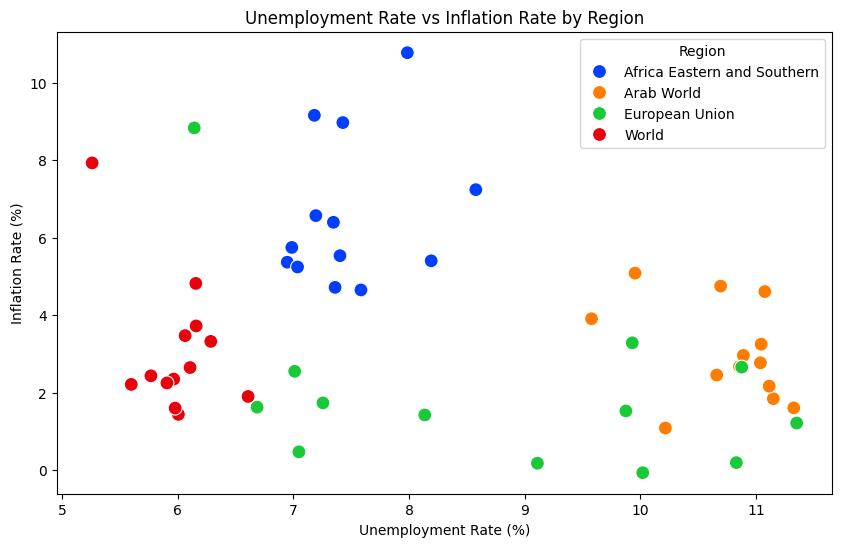

In [48]:
# Scatter plot of unemployment rate (x) vs inflation (y), countries color coded

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=country_data,
                          x="Unemployment Rate (%)",
                          y="Inflation Rate (%)",
                          hue="Country",  # different colors for each region
                          palette="bright",
                          s=100)

# Set labels and title
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Inflation Rate (%)")
plt.title("Unemployment Rate vs Inflation Rate by Region")
plt.legend(title="Region", loc='upper right')

plt.show()

This graph is a little chaotic, but we can see the differences where regions tend to occupy a certain section of the map. Interestingly, the EU data is the most erratic

In the 50s and 60s, British economist A.W. Phillips noticed an inverse relationship between unemployment rate and inflation rate. Namely, those in power could either prioritize inflation which would lead to more unemployment, or they could strive to decrease the unemployment rate which would lead to higher inflation. This model is called the "Phillips Curve", and many economists have since argued that it's too simplistic and the two variables have no correlation. Regardless, we can still apply a regression model and look for this inward curve in our data:

<Figure size 1000x600 with 0 Axes>

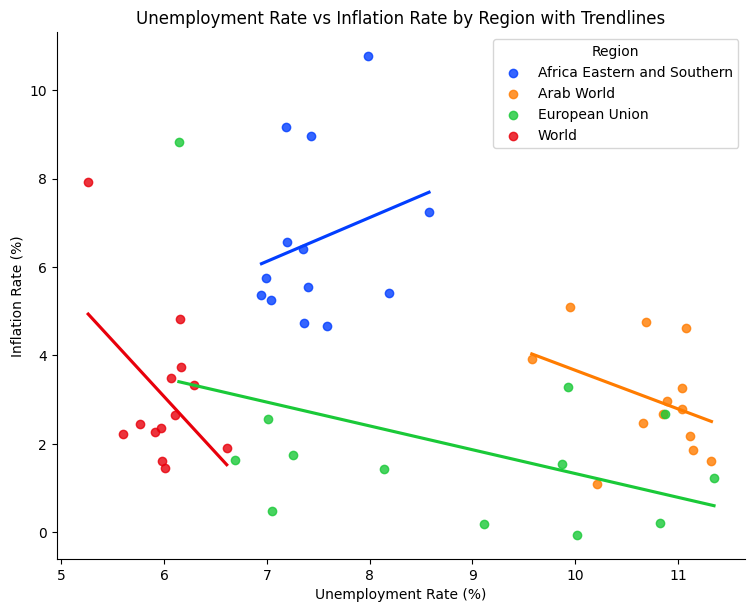

In [52]:
plt.figure(figsize=(10, 6))
scatter = sns.lmplot(data=country_data,
                     x="Unemployment Rate (%)",
                     y="Inflation Rate (%)",
                     hue="Country",
                     palette="bright",
                     ci=None,
                     aspect=1.3,
                     height=6)

plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Inflation Rate (%)")
plt.title("Unemployment Rate vs Inflation Rate by Region with Trendlines")
scatter._legend.remove()
plt.legend(title="Region", loc='upper right')
plt.show()

As we can see, most regions follow the Phillips Curve trend. The one exception is the data for 'Africa Eastern and Southern', which shows a slight positive correlation.